In [3]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [1]:
from skimage import io
img_path="../../datas_6/labels/12.tif"
img=io.imread(img_path)
print(img.shape)

(256, 416)


In [2]:
pip install tensorboard

Note: you may need to restart the kernel to use updated packages.


In [2]:
!/disk1/zzl/mmsegmentation/tools/dist_train.sh '/disk1/zzl/mmsegmentation/configs/unet/fcn_unet_r5-d16_OHEM_256x416_80k_datas6.py' 2 

*****************************************
Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
*****************************************
2022-02-16 13:02:08,450 - mmseg - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.8.8 (default, Apr 13 2021, 19:58:26) [GCC 7.3.0]
CUDA available: True
GPU 0,1: TITAN Xp
CUDA_HOME: /usr/local/cuda-9.2
NVCC: Cuda compilation tools, release 9.2, V9.2.88
GCC: gcc (Ubuntu 5.4.0-6ubuntu1~16.04.10) 5.4.0 20160609
PyTorch: 1.7.1+cu92
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) oneAPI Math Kernel Library Version 2021.2-Product Build 20210312 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v1.6.0 (Git Hash 5ef631a030a6f73131c77892041042805a06064f)
  - OpenMP 201511 (a.k.a. 

Use load_from_local loader


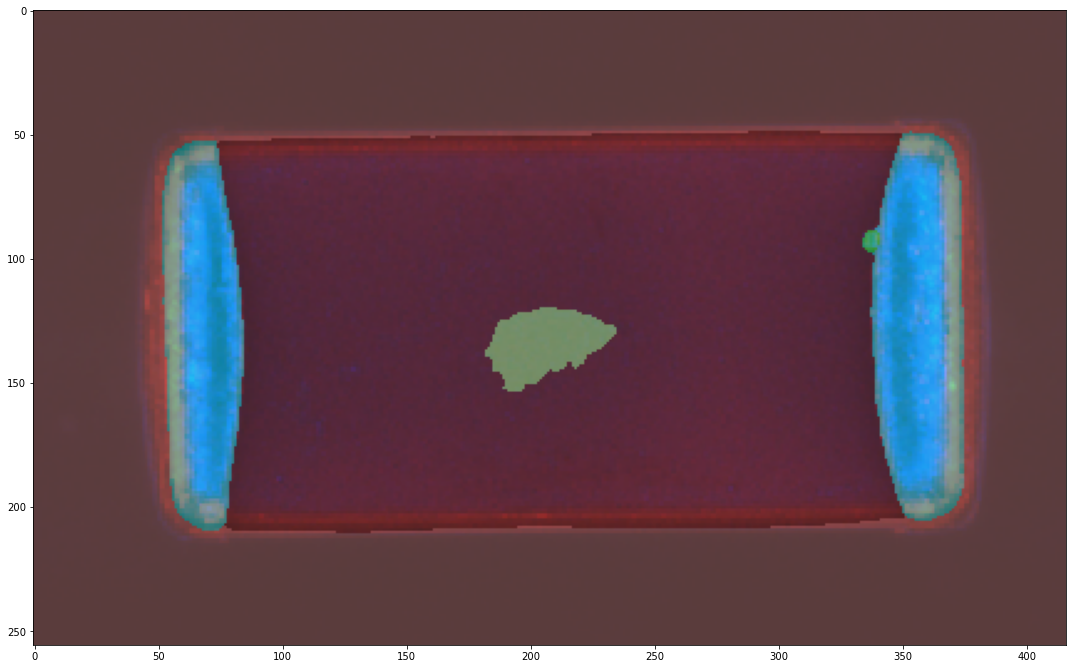

(256, 416, 3) (256, 416)


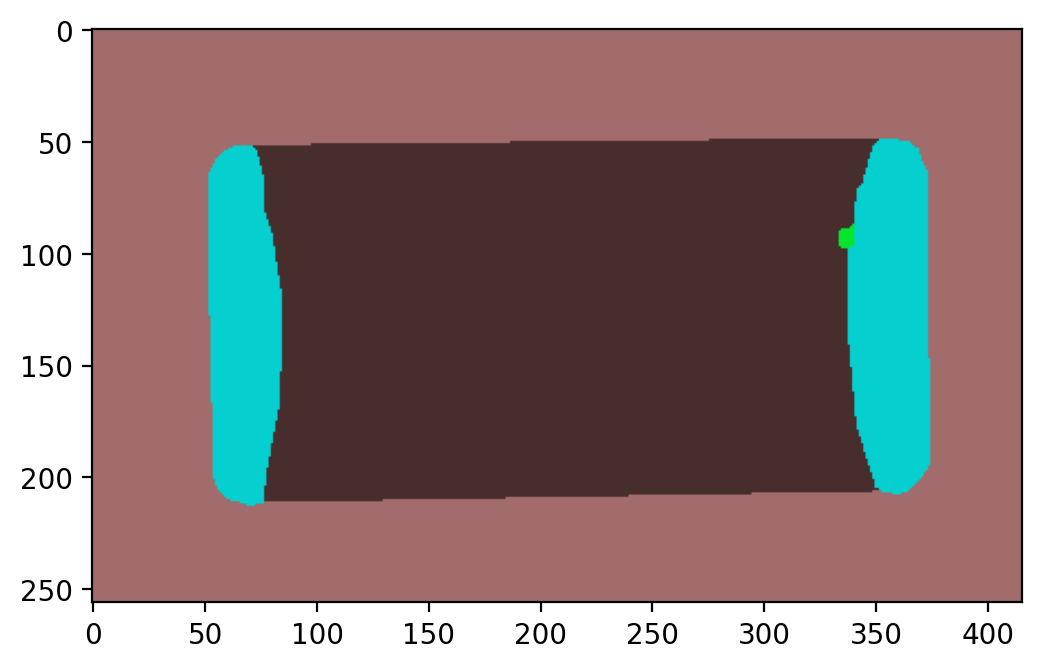

In [26]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
# set file info
sample_no='116'
checkpoint_file="/disk1/zzl/mmsegmentation/ipynb/work_dirs/fcn_unet_r5-d16_256x416_80k_datas6/latest.pth"
cfg_file="/disk1/zzl/mmsegmentation/configs/unet/fcn_unet_r5-d16_256x416_80k_datas6.py"
seg ='/disk1/zzl/mmsegmentation/data/datas_6/labels/'+sample_no+'.tif'


model=init_segmentor(cfg_file,checkpoint_file,device='cuda:0')
img_path="/disk1/zzl/mmsegmentation/data/datas_6/sources/"+sample_no+".bmp"
result=inference_segmentor(model,img_path)
PALETTE = [[180, 120, 120], [6, 230, 230], [80, 50, 50], [4, 200, 3],
               [120, 120, 80], [140, 140, 140], [204, 5, 255], [230, 230, 230],
               [4, 250, 7], [224, 5, 255], [235, 255, 7], [150, 5, 61],
               [120, 120, 70], [8, 255, 51], [255, 6, 82], [143, 255, 140],
               [204, 255, 4], [255, 51, 7], [204, 70, 3], [0, 102, 200],
               [61, 230, 250], [255, 6, 51], [11, 102, 255]]
show_result_pyplot(model,img_path,result,PALETTE)
img=Image.open(img_path)
img = np.array(img).astype(np.uint8)
#plt.imshow(img)
#plt.show()
# gt path

# print gt
label = Image.open(seg)
label = np.array(label)
print(img.shape, label.shape)
label = label.astype(np.uint8)
color_seg = np.zeros((label.shape[0], label.shape[1], 3), dtype=np.uint8)
for label_id, color in enumerate(PALETTE):
    # print(basename, set(label.flatten()), label_id, color)
    color_seg[label == label_id, :] = color
# # convert to BGR
# color_seg = color_seg[..., ::-1]
img = img * 0 + color_seg * 0.9
img = img.astype(np.uint8)
plt.imshow(img)
plt.gcf().set_dpi(200)
plt.show()
#vis(img,seg)
# img_gt=imshow_semantic(img,np.array(seg.convert('RGB')),['void', 'sky', 'building', 'column_pole', 'road',
#               'sidewalk', 'tree', 'sing_symbol', 'fence', 'car',
#               'pedestrian', 'bicyclist'],[[0, 0, 0], [128, 128, 128], [128, 0, 0], [192, 192, 128],
#                [128, 64, 128], [0, 0, 192], [128, 128, 0], [192, 128, 128],
#                [64, 64, 128], [64, 0, 128], [64, 64, 0], [0, 128, 192]])

ERROR: Could not find a version that satisfies the requirement PIL
ERROR: No matching distribution found for PIL
Note: you may need to restart the kernel to use updated packages.
